## Introduction to Deep Learning

Ali Saghi & Vinh Nguyen

We will build a network that takes two numbers as `input`, passes them through a `hidden layer` of 10 neurons, and finally `outputs` a single non-constrained number.

In [11]:
# # Import the Sequential model and Dense layer
# from keras.models import Sequential
# from keras.layers import Dense

In [12]:
# Create a Sequential
# model = Sequential()

In [13]:
# model

In [14]:
# # Add an layer of 2 as input and a hidden layer of 10
# model.add(Dense(10,input_shape=(2,),activation="relu"))

# # Add an output layer of 1
# model.add(Dense(1))

In [15]:
# # Look at our model
# model.summary()

In [16]:
# "Importing the basic libraries you can use in all of your scripts"

# import matplotlib.pyplot as plt
# import seaborn as sns

# import requests

## Impact Region

The training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor at that time step.

<center><img src="Capture.PNG"></center>

In [17]:
!pip list -v | grep keras
# just to check if Keras was installed in Google Colab, which I was using

In [18]:
import keras
# ...and to import Keras into my Google Colab

Using TensorFlow backend.


In [19]:
# I was using Google Colab during the exercises, better if files are local!
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [20]:
# deep learning is a part of ML area - inside AI . It's a very new
# method that can work with a lot of datasets, and structured and 
# unstructured (meaning like video etc.). Reading articles, most of the 
# jobs are mostly about deep learning, bec most of the companies have 
# too much data and when you want to get the best results, 
# you use deep learning methods. 

# Layers and nodes inside layers (see image in first screengrabs). 
# They got the idea from the brain. These inputs are connected 
# to each others - nodes - and at the end, is an output layers. We
# can't get deep into the mathematics, but will just intro the subject.

# Back/propagation deep learning - this is the mathematics behind it

# Terms: Network, which is composed of Input layers, hidden layers, output layers. 
# Other terms:  Edge(s), Nodes, Neurons, 


# (showing backpropagation wikipedia page) and Andrew NG 
# (from Stanford, deeplearning.ai on Youtube (see playlists), has two courses - his
# machine learning and deep learning courses) . He starts with the mathematics
# behind it and also does some coding at the same time.
# This is the best place to start and also to empower your learning 
# about Machine Learning and Deep Learning. 

# Keras : this library is the best library to learn Deep Learning for 
# beginners, in his opinion. So, for the maths, start with the Backpropagation wiki page,
# then the Andres NG courses, and then this Keras documentation site, 
# to get into Deep Learning for beginners. 

In [21]:
# First, we just want to know how to create the structure of a network:

# We will build a network that takes two numbers as 'input', passes them
# through a 'hidden layer' of 10 neurons and finally 
# output a single non-constrained number.

In [22]:
# Import the Sequential model and Dense Layer

# Note: in the file Ali sent to us after the lecture, these were imported 
# after the normal imports of numpy etc. and the read_csv lines too.

# Like in any Machine Learning problem, first off you must create a model
# So:

from keras.models import Sequential
from keras.layers import Dense
# so. see, we have keras.models and keras.layers (see the Keras documentation)

# Note Ali also got the 'Using TensorFlow backend' message, so it must work.

In [23]:
# So, now we want to create our model
# ALI LATER COMMENTED THESE LINES OUT: model = Sequential()

In [24]:
# ALI LATER COMMENTED THESE LINES OUT:  model

In [25]:
# Add a layer of 2 as input and a hidden layer of 10.
# model.add() inside this we imported this Dense and 
# everything will do inside Dense layer - the number of hidden naurons 10
# and then shape of input layer 2 (means two by one)
# model.add(Dense(10,input_shape=(2,),activation="relu"))

# Add an output layer of 1
# ALI LATER COMMENTED THESE LINES OUT: model.add(Dense(1))

In [26]:
# Look at our model
# ALI LATER COMMENTED THESE LINES OUT:  model.summary()

In [27]:
# People are having installation problems: 
# Perhaps, those will just follow along, and use 
# the afternoon slot to help each other.The idea of this is just
# to see how everything works inside Deep Learning.


In [28]:
# Impact Region
# The training data consists of measurements taken 
# at the time steps from -10 before the impact region 
# to +10 minutes after. Each tie step can be viewed as an
# x coordinate in our graph, which has an associated position y
# for the meteor at that time step.

# ali linked this image, but of course I don't have it: <center><img src="Capture_source.png"></center>


In [29]:
# Reading the data

import numpy as np
import pandas as pd

# I was using Google Colab during the exercises, better if files are local!
# Colab link: time_steps = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/time_steps.csv", header=None, names=["time_steps"])
# Colab link: y_positions = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/y_positions.csv", header=None, names=["y_positions"])




## Reading the csv file into dataframe
#This one still not used: irrigation_machine = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/irrigation_machine.csv")
# Usual thing to test: data_frame_name.head()
# Usual thing to test: data_frame_name.info()

time_steps = pd.read_csv("time_steps.csv", header=None, names=["time_steps"])
y_positions = pd.read_csv("y_positions.csv", header=None, names=["y_positions"])
time_positions = pd.concat([time_steps , y_positions], axis=1)
time_positions.head()



,time_steps,y_positions
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [30]:
# Shows us an image () Ali imported into the notebook about a meteor's
# orbital (curve) towards Earth on a graph between 'pos' and 'time'.
# So, we have the y_positions and time_steps above - this is the data we 
# have and we want our algorith to predict from the range of data we have,
# what is the shape of the orbit. 
# This is the idea and the problem we want to go through here.

In [31]:
# So, now we want to create out model. We'll use an easy model. 
# Later you can create model 2 , 3 etc (by playing of the no of neurons, 
# of hidden layers etc.)

# Create np arrays of time and positions
time_steps = np.array(time_positions["time_steps"])
y_positions = np.array(time_positions["y_positions"])


In [32]:

# Create a model
from keras.models import Sequential
from keras.layers import Dense

model_1 = Sequential()
model_1.add(Dense(50, input_shape=(1,),activation="relu")) # 50 nodes
model_1.add(Dense(50,activation="relu")) # this is the second hidden layer
model_1.add(Dense(50,activation="relu")) # this is the third hidden layer
# so, we have added an input and hidden layer, activation function is relu
model_1.add(Dense(1)) #output layer?

In [33]:
model_1

In [34]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


##### Training
Remember that before training the Keras models we need to compile them. This can be done with the `.compile()` method. The .compile() method takes arguments such as the `optimizer`, used for weight updating, and the `loss` function, which is what we want to minimize. Training the model is as easy as calling the `.fit()` method, passing on the features, labels and number of epochs to train for.

In [35]:
# We don't need to understand the physics behind this, "I don't," 
# but the orbit is A KIND OF TIME SERIES, and we'll use a 
# model to predict the shape of the orbit (specifically outside?) the range
# now we want to model the data that we've trained?

# At the moment we have a data frame 
# but inside it we want to put numpy arrays. 
# (goes to create a new field above create a model)



In [36]:
# Compile our model
model_1.compile(optimizer="adam", loss="mse") 

# I had model_compile... 
# instead of model_1.compile... Ali had model_ but mine didn't work...
# now, with model_1.compile, it works...
# mse is mean square error?

In [37]:
# Fitting the model with our dataset
model_1.fit(time_steps, y_positions, epochs=30)

# Accuracy
print("Final lost value:", model_1.evaluate(time_steps, y_positions))

Epoch 1/30
2000/2000 [==============================] - 0s 92us/step - loss: 1558.9122
Epoch 2/30
2000/2000 [==============================] - 0s 32us/step - loss: 245.5879
Epoch 3/30
2000/2000 [==============================] - 0s 30us/step - loss: 139.8552
Epoch 4/30
2000/2000 [==============================] - 0s 30us/step - loss: 120.4020
Epoch 5/30
2000/2000 [==============================] - 0s 29us/step - loss: 100.7075
Epoch 6/30
2000/2000 [==============================] - 0s 30us/step - loss: 77.7953
Epoch 7/30
2000/2000 [==============================] - 0s 30us/step - loss: 53.7778
Epoch 8/30
2000/2000 [==============================] - 0s 30us/step - loss: 33.0380
Epoch 9/30
2000/2000 [==============================] - 0s 29us/step - loss: 18.6708
Epoch 10/30
2000/2000 [==============================] - 0s 29us/step - loss: 10.9860
Epoch 11/30
2000/2000 [==============================] - 0s 30us/step - loss: 6.4331
Epoch 12/30
2000/2000 [==============================] - 0

##### Predicting the orbit!

We've already trained a model that approximates the orbit of the meteor approaching earth.
Since we trained the model for values between -10 and 10 minutes, the model hasn't yet seen any other values for different time steps. We will visualize how the model behaves on unseen data.

In [42]:
# Create a function for plotting the orbit
import matplotlib.pyplot as plt
import seaborn as sns


def plot_orbit(model_preds):
    axeslim = int(len(model_preds)/2)
    plt.plot(np.arange(-axeslim,axeslim+1),np.arange(-axeslim,axeslim+1)**2,color="mediumslateblue")
    plt.plot(np.arange(-axeslim,axeslim+1),model_preds,color="orange")
    plt.axis([-40,41,-5,550])
    plt.legend(["Scientists's orbit","Model prediction"])
    plt.title("Model orbit vs Scientist's orbit")
    plt.show()


# # Copied into chat by Ali, in case the above doesn't work
# def plot_orbit(model_preds):
#    axeslim = int(len(model_preds)/2)
#    plt.plot(np.arange(-axeslim,axeslim+1),np.arange(-axeslim,axeslim+1)**2,color="mediumslateblue")
#    plt.plot(np.arange(-axeslim,axeslim+1),model_preds,color="orange")
#    plt.axis([-40,41,-5,550])
#    plt.legend(["Scientists's orbit","Model prediction"])
#    plt.title("Model orbit vs Scientist's orbit")
#    plt.show()


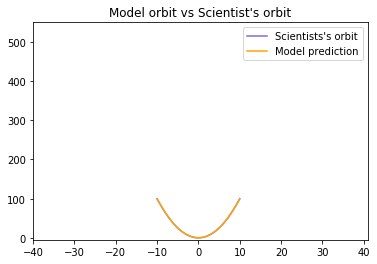

In [43]:
# Predict 20 minutes
#my original didn't work? twenty_minuts = model_1.predict(np.arange(-40, 41))
#my original didn't work? plot_orbit(twenty_minuts)

# Ali's code:
twenty_minuts = model_1.predict(np.arange(-10,11))
plot_orbit(twenty_minuts)

# talk about optimization for accuracy
# Ali comment to Seppo: Deep Learning means that you have too much data.
# Here, we have only like 300 (data points?) of data, so not much.

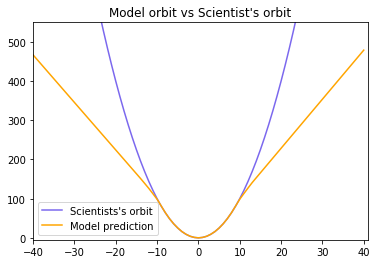

In [44]:
# Predict 40 minutes 
twenty_minuts = model_1.predict(np.arange(-40,41))
plot_orbit(twenty_minuts)

## Create a different network

In [45]:

model_2 = Sequential()
model_2.add(Dense(25, input_shape=(1,), activation="relu"))
# relu means rectified linear
model_2.add(Dense(25, activation="relu"))
model_2.add(Dense(55, activation="relu"))
model_2.add(Dense(50, activation="relu"))
model_2.add(Dense(50, activation="relu"))
model_2.add(Dense(1))

In [ ]:
# So, in general, If you want to know how something works, 
# you create a model, create some layers and put some data inside it
# that's all we have done here. If you don't have enough data, 
# just use Machine Learning algorithms - your work will be more accurate.

In [46]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 25)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 55)                1430      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2800      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 7,531
Trainable params: 7,531
Non-trainable params: 0
____________________________________________________

In [47]:
# Ali will send us his notebook. so I can look at my errors 
# and stuff I wasn't fast enough to type above.

# Next week will be reviewing your project and the week after that 
# you'll present your project. 



# -------- From here, all is from Ali's notebook ---------

In [48]:
# Compile our model
model_2.compile(optimizer="adam",loss="mse")

# Fitting the model with our dataset
model_2.fit(time_steps,y_positions,epochs=50)

# Accuracy
print("Final lost value:",model_2.evaluate(time_steps,y_positions))

Epoch 1/50
2000/2000 [==============================] - 0s 136us/step - loss: 1108.7978
Epoch 2/50
2000/2000 [==============================] - 0s 42us/step - loss: 146.3420
Epoch 3/50
2000/2000 [==============================] - 0s 43us/step - loss: 106.3374
Epoch 4/50
2000/2000 [==============================] - 0s 38us/step - loss: 57.6929
Epoch 5/50
2000/2000 [==============================] - 0s 37us/step - loss: 21.0661
Epoch 6/50
2000/2000 [==============================] - 0s 37us/step - loss: 6.1734
Epoch 7/50
2000/2000 [==============================] - 0s 37us/step - loss: 3.2450
Epoch 8/50
2000/2000 [==============================] - 0s 37us/step - loss: 1.9061
Epoch 9/50
2000/2000 [==============================] - 0s 38us/step - loss: 0.8822
Epoch 10/50
2000/2000 [==============================] - 0s 38us/step - loss: 0.7482
Epoch 11/50
2000/2000 [==============================] - 0s 37us/step - loss: 0.4994
Epoch 12/50
2000/2000 [==============================] - 0s 37us

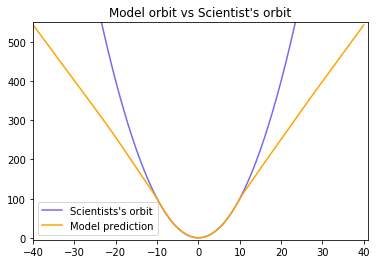

In [49]:
# Predict 40 minutes 
minuts = model_2.predict(np.arange(-40,41))
plot_orbit(minuts)